<a href="https://colab.research.google.com/github/dev02chandan/recommendation-systems/blob/main/Rating_prediction_using_matrix_factorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim:
In this project, we aim to implement Singular Value Decompostion on a Rating matrix of a books dataset.

The aim is to try to write the functions from scratch, along with testing for hyperparameters.

Further, implement Batch Gradient descent after Stochastic Gradient Descent.

Finally, add user and item bias to the functions.

## Task 1:
Implement SVD

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import numpy as np
from scipy.sparse import coo_matrix
from scipy.sparse.linalg import svds


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

books = pd.read_csv('/content/drive/MyDrive/RS/6Books.csv',encoding="latin-1")

print("Books.csv shape::", books.shape)
print("Books.csv columns:: ", books.columns)
print("Number of Unique Books::", books['bookISBN'].nunique())

books.head()

Books.csv shape:: (3000, 8)
Books.csv columns::  Index(['Unnamed: 0.1', 'Unnamed: 0', 'bookISBN', 'bookName', 'author',
       'yearOfPublication', 'publisher', 'urlId'],
      dtype='object')
Number of Unique Books:: 3000


,Unnamed: 0.1,Unnamed: 0,bookISBN,bookName,author,yearOfPublication,publisher,urlId
0,62044,26575,1551669382,Enchanted Afternoon,Susan Wiggs,2002,Mira,120656.0
1,85751,1995,0743202961,Every Breath You Take : A True Story of Obsess...,Ann Rule,2001,Free Press,116803.0
2,122688,7677,067151699X,The HIDDEN LIFE OF DOGS,Elizabeth Marshall Thomas,1995,Pocket,1805.0
3,87360,36120,0804108528,Inadmissible Evidence,Philip Friedman,1993,Ivy Books,139375.0
4,73712,30238,0061094145,"The Fifth Dominion (Imajica, Book 1)",Clive Barker,1995,HarperTorch,141585.0


In [ ]:
#Read Users.csv and Analyze

users = pd.read_csv('/content/drive/MyDrive/RS/6Users.csv',encoding="latin-1")

print("users.csv shape::", users.shape)
print("users.csv columns:: ", users.columns)
print("Number of Unique users::", users['user'].nunique())

users.head()

users.csv shape:: (1000, 5)
users.csv columns::  Index(['Unnamed: 0.1', 'Unnamed: 0', 'user', 'location', 'age'], dtype='object')
Number of Unique users:: 1000


,Unnamed: 0.1,Unnamed: 0,user,location,age
0,57300,43156,43157.0,"windsor, ontario, canada",22.0
1,40638,99031,99032.0,"white plains, new york, usa",25.0
2,54265,42882,42883.0,"the woodlands, texas, usa",51.0
3,83797,183799,183800.0,"quebec, quebec, canada",29.0
4,96743,188795,188796.0,"toronto, ontario, canada",NaN


In [ ]:
#Read UserEvents.csv and Analyze

events = pd.read_csv('/content/drive/MyDrive/RS/6UserEvents.csv',encoding="latin-1")

print("events.csv shape::", events.shape)
print("events.csv columns:: ", events.columns)
print(events.dtypes)

events.head()


events.csv shape:: (141081, 4)
events.csv columns::  Index(['Unnamed: 0', 'user', 'bookId', 'impression'], dtype='object')
Unnamed: 0     int64
user           int64
bookId        object
impression    object
dtype: object


,Unnamed: 0,user,bookId,impression
0,16,276747,0060517794,checkout
1,19,276747,0671537458,checkout
2,20,276747,0679776818,add to cart
3,133,276822,0060096195,checkout
4,137,276822,0375821813,checkout


In [ ]:
book_impression_counts = events.groupby('bookId').size().reset_index(name='event_count')

In [ ]:
book_impression_counts

,bookId,event_count
0,0002005018,7
1,0002251760,6
2,0002259001,5
3,0003300277,5
4,0006374921,5
...,...,...
11229,9726106141,8
11230,9726116902,5
11231,9727722458,10
11232,9770390107900,7


In [ ]:
book_impression_count = book_impression_counts.sort_values(by='event_count', ascending=False)

In [ ]:
#Analyze UserEvents file to check most popular books
#------------------------------
book_impression_count.head(10)

,bookId,event_count
1793,0316666343,438
3665,0385504209,339
10277,0971880107,270
1472,0312195516,246
7396,059035342X,227
1267,0142001740,221
8556,0679781587,210
339,0060928336,207
5343,0446672211,200
7753,0671027360,190


In [ ]:
events.columns

Index(['Unnamed: 0', 'user', 'bookId', 'impression'], dtype='object')

In [ ]:
most_active_users = events.groupby('user').size().reset_index(name='user_activity').sort_values(by='user_activity',ascending=False)

In [ ]:
print(most_active_users)

        user  user_activity
495    11676           2803
4663   98391            790
7236  153662            498
722    16795            432
5412  114368            378
...      ...            ...
4654   98254              1
4667   98443              1
4669   98474              1
4681   98668              1
0          8              1

[13030 rows x 2 columns]


In [ ]:
print("Most Active users::")
most_active_users[:10]

Most Active users::


,user,user_activity
495,11676,2803
4663,98391,790
7236,153662,498
722,16795,432
5412,114368,378
4541,95359,378
4949,104636,303
5838,123883,285
1697,35859,281
9537,204864,270


In [ ]:
events.columns

Index(['Unnamed: 0', 'user', 'bookId', 'impression'], dtype='object')

In [ ]:
impression_data = events.groupby('impression').size().reset_index(name='count')

In [ ]:
print(impression_data)

    impression  count
0  add to cart  34726
1     checkout  52940
2      dislike   5206
3     interact  10801
4         like  23769
5         view  13639


<BarContainer object of 6 artists>

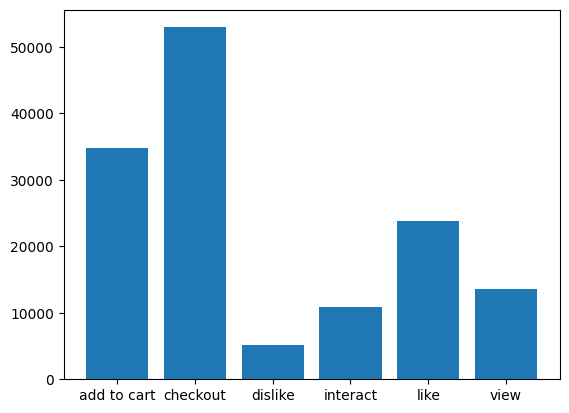

In [ ]:
#Visualizing UserEvents data
#-------------------------------
plt.bar(impression_data['impression'], impression_data['count'])

In [ ]:
events['impression'].unique()

array(['checkout', 'add to cart', 'view', 'like', 'interact', 'dislike'],
      dtype=object)

In [ ]:
impression_mapping = {
    'checkout': 5,    # Highest rating
    'add to cart': 4,
    'like': 3,
    'interact': 2,
    'view': 1,
    'dislike': -1     # Lowest rating
}


In [ ]:
events['impression_rating'] = events['impression'].map(impression_mapping)

In [ ]:
#Convert UserEvents.impression feature to numeric values/ratings.
#Checkout value has highest rating and dislike has lowest
#-----------------------------------------------------------------
events.head()

,Unnamed: 0,user,bookId,impression,impression_rating
0,16,276747,0060517794,checkout,5
1,19,276747,0671537458,checkout,5
2,20,276747,0679776818,add to cart,4
3,133,276822,0060096195,checkout,5
4,137,276822,0375821813,checkout,5


In [ ]:
average_rating = pd.DataFrame(events.groupby('bookId')['impression_rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(events.groupby('bookId')['impression_rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head(20)


,impression_rating,ratingCount
bookId,,
0316666343,4.036530,438
0385504209,4.206490,339
0971880107,0.418519,270
0312195516,4.048780,246
059035342X,4.502203,227
0142001740,4.153846,221
0679781587,4.214286,210
0060928336,3.777778,207
0446672211,3.980000,200


In [ ]:
#Convert Data Frame to Pivot Matrix (USERS X BOOKS), fill NA with 0
#------------------------------------------------------------------
ratings_pivot = events.pivot(index='user', columns='bookId', values="impression_rating").fillna(0)
print(ratings_pivot.shape)
ratings_pivot.head(20)

(13030, 11234)


bookId,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
user,,,,,,,,,,,,,,,,,,,,,
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
244,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
ratings_pivot.values

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
#Extract Users and Books as a list to be used later when converting Matrix back to Data Frame output
#--------------------------------------------------------------------------------------------------
users_list = ratings_pivot.index.tolist()
books_list = ratings_pivot.columns.tolist()

In [ ]:
users_list[:5]

[8, 99, 114, 232, 242]

In [ ]:
books_list[:5]

['0002005018', '0002251760', '0002259001', '0003300277', '0006374921']

The scipy.sparse module in the SciPy library provides support for sparse matrices. The coo_matrix function in SciPy is used to create a sparse matrix in Coordinate Format (COO). COO format is an efficient way to represent sparse matrices, especially when you have the explicit row and column indices of non-zero elements.

1. **Explicit Storage of Non-Zero Elements:** In COO format, you explicitly store the row and column indices along with the values of non-zero elements. This makes it easy to locate and access the non-zero elements.

2. **Memory Efficiency:** COO format is memory-efficient when dealing with sparse matrices because it only stores information about the non-zero elements. This can lead to significant memory savings for large sparse matrices compared to dense representations.

3. **Fast Element Access:** Retrieving elements from a COO matrix is relatively fast and efficient because you have direct access to the row and column indices.



In [ ]:
from scipy.sparse import coo_matrix

R = coo_matrix(ratings_pivot.values)

print ("R Shape::", R.shape)
print ("R Columns::", R.col)
print ("R Rows::",R.row)

R Shape:: (13030, 11234)
R Columns:: [   0 1487 1495 ... 2833 4229 7226]
R Rows:: [    0     1     1 ... 13029 13029 13029]


In [ ]:
print(R)

  (0, 0)	1.0
  (1, 1487)	4.0
  (1, 1495)	4.0
  (1, 1812)	3.0
  (1, 5358)	5.0
  (1, 5684)	-1.0
  (2, 5259)	5.0
  (2, 5313)	5.0
  (2, 5316)	4.0
  (2, 5891)	4.0
  (2, 7306)	5.0
  (2, 7753)	5.0
  (3, 6187)	4.0
  (4, 6869)	5.0
  (4, 10937)	4.0
  (4, 10954)	5.0
  (4, 11064)	4.0
  (5, 308)	5.0
  (5, 428)	3.0
  (5, 1786)	5.0
  (5, 1817)	5.0
  (5, 1844)	3.0
  (5, 2736)	5.0
  (5, 3485)	2.0
  (5, 3690)	3.0
  :	:
  (13025, 11170)	1.0
  (13025, 11194)	1.0
  (13026, 5946)	4.0
  (13026, 6389)	2.0
  (13026, 8994)	4.0
  (13026, 9063)	5.0
  (13027, 130)	5.0
  (13027, 245)	3.0
  (13027, 1068)	4.0
  (13027, 1253)	5.0
  (13027, 3435)	4.0
  (13027, 3955)	5.0
  (13027, 4572)	3.0
  (13027, 6848)	4.0
  (13027, 7396)	4.0
  (13027, 8314)	4.0
  (13027, 9282)	5.0
  (13027, 9444)	4.0
  (13028, 4426)	1.0
  (13028, 4836)	1.0
  (13028, 10193)	1.0
  (13028, 10472)	4.0
  (13029, 2833)	3.0
  (13029, 4229)	3.0
  (13029, 7226)	4.0


In [ ]:
#  Factor matrix shape
M,N=R.shape

# No of Factors - 3
K=3

# using random values of P and Q
P=np.random.rand(M,K)
Q=np.random.rand(K,N)

In [ ]:
P.shape

(13030, 3)

In [ ]:
Q

array([[0.69184896, 0.06623795, 0.85543048, ..., 0.26557887, 0.57354251,
        0.28333408],
       [0.21915307, 0.88096879, 0.98228823, ..., 0.21976234, 0.34576416,
        0.8410107 ],
       [0.08165558, 0.04535635, 0.08539112, ..., 0.70601429, 0.79512055,
        0.89153337]])

In [ ]:
R.data

array([1., 4., 4., ..., 3., 3., 4.])

In [ ]:
#Computing Total Mean Squared Error
#--------------------------------
from numpy.linalg import norm

def error(R,P,Q,lamda=0.02):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0
    for ui in range(len(ratings)):
        rui=ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui>0:
            e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\
                lamda*(pow(norm(P[u,:]),2)+pow(norm(Q[:,i]),2))
    return e

In [ ]:
R.data

array([1., 4., 4., ..., 3., 3., 4.])

In [ ]:
error(R,P,Q)

1490756.7148253918

In [ ]:
rmse = np.sqrt(error(R,P,Q)/len(R.data))

In [ ]:
rmse

3.250641850812277

In [ ]:
def SGD(R, K, lamda=0.02,steps=10, gamma=0.001):

    M,N = R.shape
    P = np.random.rand(M,K)
    Q = np.random.rand(K,N)

    rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
    print("Initial RMSE: "+str(rmse))

    for step in range(steps):
        for ui in range(len(R.data)):
            rui=R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui>0:
                eui=rui-np.dot(P[u,:],Q[:,i])
                P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
                Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
        rmse = np.sqrt(error(R,P,Q,lamda)/len(R.data))
        if rmse<0.5:
            break
    print("Final RMSE: "+str(rmse))
    return P,Q

In [ ]:
P,Q=SGD(R,K=3,gamma=0.0007,lamda=0.01, steps=10)

Initial RMSE: 3.238402211919714
Final RMSE: 1.8990315350877423


In [ ]:
#100 iterations will run for 10-15mins, gamma and lamda values can be modifed in order to optimize the model.
#-----------------------------------------------------------------------------------------------------
P,Q=SGD(R,K=5,gamma=0.01,lamda=0.01, steps=100)

Initial RMSE: 2.8261427042520717
Final RMSE: 0.6340376390522171


In [ ]:
#all_user_predicted_ratings = np.dot(np.dot(P, sigma), Q)
all_user_ratings =np.matmul(P, Q)

all_user_ratings

array([[ 1.01880702,  0.9193145 ,  1.34659772, ...,  1.17538707,
         0.93605014,  1.29130959],
       [ 4.74447651,  4.98011899,  4.45781418, ...,  2.03337818,
         5.40442639,  4.62247448],
       [ 4.70796733,  4.85785179,  4.50841481, ...,  3.44145742,
         5.22690075,  5.4852492 ],
       ...,
       [ 3.38376352,  4.56439443,  5.01891105, ...,  3.76936553,
         6.10473536,  4.35979817],
       [ 2.50793308,  2.24174092,  1.49943762, ..., -0.46952336,
         1.98180127,  1.96602376],
       [ 2.20707076,  3.20239367,  3.47378349, ...,  2.56594026,
         4.4152016 ,  2.42986515]])

In [ ]:
#Converting the reconstructed matrix back to dataframe
# Rounding off to 4 digits instead of default 6 so that output.csv file is less than 1GB
all_user_ratings_df = pd.DataFrame(np.round(all_user_ratings,4),columns=books_list, index=users_list)
all_user_ratings_df.shape

(13030, 11234)

In [ ]:
all_user_ratings_df.head(10)

,0002005018,0002251760,0002259001,0003300277,0006374921,0006480764,000648302X,0006485014,0006485200,0006493580,...,950491036X,9580464162,9722015184,9722020609,9726101794,9726106141,9726116902,9727722458,9770390107900,9871138148
8,1.0188,0.9193,1.3466,1.1320,0.8238,1.0245,1.1829,1.2711,0.4099,1.3829,...,1.2166,0.7676,1.1452,0.5981,0.7039,1.2199,0.5951,1.1754,0.9361,1.2913
99,4.7445,4.9801,4.4578,4.1207,4.8092,1.5757,5.4139,1.8766,3.7283,4.2572,...,4.6724,3.5065,4.5718,2.3719,3.2699,3.8150,3.1528,2.0334,5.4044,4.6225
114,4.7080,4.8579,4.5084,5.9017,4.6826,3.9090,5.6963,3.9188,3.0370,5.1452,...,5.0151,4.0929,6.1933,3.6918,5.1374,5.7333,2.4914,3.4415,5.2269,5.4852
232,3.4246,3.8039,3.9341,3.3685,3.7116,1.6873,4.0928,2.2176,3.1029,3.5994,...,3.7632,2.7146,3.4839,1.6967,2.5570,3.3680,2.4806,2.1333,4.4003,3.2926
242,4.8024,5.1474,4.6387,5.3439,5.1048,2.8833,5.6258,2.9749,3.6408,4.8284,...,5.1154,4.1357,5.8779,3.3082,4.7745,5.2171,3.0075,2.9385,5.7026,5.2376
243,3.3332,5.1951,4.8617,4.0508,5.4430,1.1435,4.7513,2.0231,6.3418,3.6084,...,4.2250,3.3386,3.5669,1.3870,3.5218,4.1793,3.4076,1.5089,7.2396,1.7437
244,1.5513,2.8427,3.8972,4.5763,3.3817,3.8258,2.5010,4.4057,3.0096,3.6296,...,3.6007,3.1019,4.5419,2.3744,4.7306,5.5926,1.7947,3.9154,4.4474,2.1774
254,3.1005,3.8715,4.7190,4.7840,4.5158,3.2595,3.3975,3.6457,2.8528,4.3854,...,4.9956,4.1179,5.9456,3.0775,5.1997,5.8358,2.9625,4.3848,5.0163,4.4279
300,2.7301,2.6616,0.0178,2.0550,2.3278,-0.2771,3.2320,-1.2812,1.8863,0.7915,...,1.1714,1.5190,2.2147,1.7180,2.0466,0.7908,0.7815,-1.5330,2.3314,2.1376
383,5.8173,4.9010,5.4624,4.1667,3.1943,3.0997,7.5833,4.4058,2.9994,5.8692,...,4.2009,1.8659,2.2718,1.1982,0.0420,2.7327,2.0977,2.1637,4.2633,4.6513


In [ ]:
#Saving Users Ratings for Books in an output.csv for submission

# output.csv is a MXN Matrix, where M is the number of users and N is the number of products as per evaluation criteria.
# A higher rating indicates that the user is more likely to purchase a product.
#--------------------------------------------------------------
all_user_ratings_df.to_csv('/content/drive/MyDrive/RS/6output.csv', sep=',', encoding='utf-8')

In [ ]:
all_user_ratings_df1=all_user_ratings_df.transpose()
all_user_ratings_df1.head()

,8,99,114,232,242,243,244,254,300,383,...,278563,278565,278582,278633,278663,278668,278694,278843,278851,278854
0002005018,1.0188,4.7445,4.7080,3.4246,4.8024,3.3332,1.5513,3.1005,2.7301,5.8173,...,3.4789,6.3567,4.0542,2.7860,1.8724,1.3133,5.4298,3.3838,2.5079,2.2071
0002251760,0.9193,4.9801,4.8579,3.8039,5.1474,5.1951,2.8427,3.8715,2.6616,4.9010,...,4.9509,7.1291,4.5098,4.3850,2.4892,1.6709,4.5005,4.5644,2.2417,3.2024
0002259001,1.3466,4.4578,4.5084,3.9341,4.6387,4.8617,3.8972,4.7190,0.0178,5.4624,...,5.7060,7.5332,3.7612,4.2858,3.4531,1.5106,4.3491,5.0189,1.4994,3.4738
0003300277,1.1320,4.1207,5.9017,3.3685,5.3439,4.0508,4.5763,4.7840,2.0550,4.1667,...,5.0393,6.2253,2.9437,4.3341,2.3492,2.0892,3.7675,4.2202,0.4742,3.5908
0006374921,0.8238,4.8092,4.6826,3.7116,5.1048,5.4430,3.3817,4.5158,2.3278,3.1943,...,5.6953,7.7441,5.3957,5.0665,3.6556,1.6498,3.8743,5.5655,1.9730,3.6266


In [ ]:
# Lets display the top 5 Recommended books for User: 99
top_five_df= all_user_ratings_df1[99].sort_values(ascending=False)

In [ ]:
top_five_df.head(5)

0618045996    7.5765
0571198775    7.4373
0375705171    7.1275
0440228654    7.0365
0140346414    7.0292
Name: 99, dtype: float64

## Task 2:

Varying value of hyperparameters

### Epochs

In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.01, steps=100)

Initial RMSE: 3.2285190406258835
Final RMSE: 0.7922381523980846


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 3.252261236807735
Final RMSE: 0.8147800565595973


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.01, steps=20)

Initial RMSE: 3.237311521050209
Final RMSE: 0.9000008448823044


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.01, steps=10)

Initial RMSE: 3.2530355189593876
Final RMSE: 0.9754556569583349


We can see that more epochs can decrease the RMSE error, but the decrease in error is less as the number of epochs increases.

50 epochs seems like a good measure.

### Varying lambda

In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.001, steps=50)

Initial RMSE: 3.235664156085477
Final RMSE: 0.763064851113282


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 3.2404849760470955
Final RMSE: 0.821623694963696


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.02, steps=50)

Initial RMSE: 3.237355253395744
Final RMSE: 0.8678040498401451


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.5, steps=50)

Initial RMSE: 3.3749597075417577
Final RMSE: 2.1055764937138353


As the regularisation factor increases, the RMSE also increases.

Hence the regularisation factor must be kept low. 0.001 is a good value

### Varying K

In [ ]:
P,Q=SGD(R,K=1,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 3.672006255799699
Final RMSE: 1.0283994348047272


In [ ]:
P,Q=SGD(R,K=3,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 3.2459261481056916
Final RMSE: 0.8181127015655936


In [ ]:
P,Q=SGD(R,K=5,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 2.807046192398878
Final RMSE: 0.676112025982447


In [ ]:
P,Q=SGD(R,K=9,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 2.0826888139160595
Final RMSE: 0.5196616914057314


More factors can decrease the error considerably.

### Varying LR

In [ ]:
P,Q=SGD(R,K=5,gamma=0.001,lamda=0.01, steps=50)

Initial RMSE: 2.816663528923055
Final RMSE: 0.9965351262612318


In [ ]:
P,Q=SGD(R,K=5,gamma=0.01,lamda=0.01, steps=50)

Initial RMSE: 2.8164774763517455
Final RMSE: 0.6882645353223461


In [ ]:
P,Q=SGD(R,K=5,gamma=0.05,lamda=0.01, steps=50)

Initial RMSE: 2.8335404566719267


<ipython-input-43-c0c260210ddd>:18: RuntimeWarning: overflow encountered in multiply
  Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
<ipython-input-43-c0c260210ddd>:17: RuntimeWarning: overflow encountered in multiply
  P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
<ipython-input-43-c0c260210ddd>:18: RuntimeWarning: invalid value encountered in subtract
  Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
<ipython-input-43-c0c260210ddd>:17: RuntimeWarning: invalid value encountered in add
  P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
<ipython-input-38-7b4ae06cae30>:15: RuntimeWarning: overflow encountered in double_scalars
  e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\


Final RMSE: nan


In [ ]:
P,Q=SGD(R,K=5,gamma=0.1,lamda=0.01, steps=50)

Initial RMSE: 2.8224382866934805


<ipython-input-43-c0c260210ddd>:18: RuntimeWarning: overflow encountered in multiply
  Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
<ipython-input-43-c0c260210ddd>:17: RuntimeWarning: overflow encountered in multiply
  P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
<ipython-input-43-c0c260210ddd>:18: RuntimeWarning: invalid value encountered in subtract
  Q[:,i]=Q[:,i]+gamma*2*(eui*P[u,:]-lamda*Q[:,i])
<ipython-input-43-c0c260210ddd>:17: RuntimeWarning: invalid value encountered in add
  P[u,:]=P[u,:]+gamma*2*(eui*Q[:,i]-lamda*P[u,:])
<ipython-input-38-7b4ae06cae30>:15: RuntimeWarning: overflow encountered in double_scalars
  e= e + pow(rui-np.dot(P[u,:],Q[:,i]),2)+\


Final RMSE: nan


Varying the Learning rate to a higher value gave very accurate results.

The best RMSE was seen with Learning_rate = 0.01 with RMSE of 0.814

### Best Combination

In [ ]:
# Best combination
P,Q=SGD(R,K=9,gamma=0.01,lamda=0.001, steps=50)

Initial RMSE: 2.0527330824994054
Final RMSE: 0.49586144387901626


## Task 3:
Implement Batch Gradient

In [ ]:
def batch_GD(R, K, lamda=0.02, steps=10, gamma=0.001, batch_size=32):
    M, N = R.shape
    P = np.random.rand(M, K)
    Q = np.random.rand(K, N)

    rmse = np.sqrt(error(R, P, Q, lamda) / len(R.data))
    print("Initial RMSE: " + str(rmse))

    for step in range(steps):
        for start in range(0, len(R.data), batch_size):
            end = start + batch_size
            if end > len(R.data):
                end = len(R.data)

            batch_indices = range(start, end)
            batch_errors = []

            for ui in batch_indices:
                rui = R.data[ui]
                u = R.row[ui]
                i = R.col[ui]
                if rui > 0:
                    eui = rui - np.dot(P[u, :], Q[:, i])
                    batch_errors.append(eui)
                    P[u, :] = P[u, :] + gamma * 2 * (eui * Q[:, i] - lamda * P[u, :])
                    Q[:, i] = Q[:, i] + gamma * 2 * (eui * P[u, :] - lamda * Q[:, i])

            # Compute RMSE for this batch
            batch_rmse = np.sqrt(np.mean(np.square(batch_errors)))

        rmse = np.sqrt(error(R, P, Q, lamda) / len(R.data))
        if rmse < 0.5:
            break
    print("Final RMSE: " + str(rmse))
    return P, Q

In [ ]:
P,Q= batch_GD(R,K=9,gamma=0.01,lamda=0.001, steps=50)

Initial RMSE: 2.0645303855215724
Final RMSE: 0.4926897211768041


## Task 4:
Add Item and User Bias

In [ ]:
def error_with_bias(R, P, Q, user_bias, item_bias, lamda=0.02):
    ratings = R.data
    rows = R.row
    cols = R.col
    e = 0
    for ui in range(len(ratings)):
        rui = ratings[ui]
        u = rows[ui]
        i = cols[ui]
        if rui > 0:
            prediction = np.dot(P[u, :], Q[:, i]) + user_bias[u] + item_bias[i]
            e = e + pow(rui - prediction, 2) + \
                lamda * (pow(norm(P[u, :]), 2) + pow(norm(Q[:, i]), 2) + pow(user_bias[u], 2) + pow(item_bias[i], 2))
    return e


In [ ]:
def SGD_with_bias(R, K, lamda=0.02, steps=10, gamma=0.001):
    M, N = R.shape
    P = np.random.rand(M, K)
    Q = np.random.rand(K, N)
    user_bias = np.zeros(M)
    item_bias = np.zeros(N)

    rmse = np.sqrt(error_with_bias(R, P, Q, user_bias, item_bias, lamda) / len(R.data))
    print("Initial RMSE: " + str(rmse))

    for step in range(steps):
        for ui in range(len(R.data)):
            rui = R.data[ui]
            u = R.row[ui]
            i = R.col[ui]
            if rui > 0:
                prediction = np.dot(P[u, :], Q[:, i]) + user_bias[u] + item_bias[i]
                eui = rui - prediction
                user_bias[u] += gamma * (eui - lamda * user_bias[u])
                item_bias[i] += gamma * (eui - lamda * item_bias[i])
                P[u, :] = P[u, :] + gamma * 2 * (eui * Q[:, i] - lamda * P[u, :])
                Q[:, i] = Q[:, i] + gamma * 2 * (eui * P[u, :] - lamda * Q[:, i])

        rmse = np.sqrt(error_with_bias(R, P, Q, user_bias, item_bias, lamda) / len(R.data))
        if rmse < 0.5:
            break

    print("Final RMSE: " + str(rmse))
    return P, Q, user_bias, item_bias

In [ ]:
P, Q, user_bias, item_bias =SGD_with_bias(R=R,K=9,lamda=0.001,steps=50,gamma=0.01)

Initial RMSE: 2.062414084197507
Final RMSE: 0.49422739148868855


In [ ]:
user_bias

array([-0.13621239,  0.09967955,  0.28121968, ...,  0.25007446,
       -0.24501274,  0.09479292])

In [ ]:
item_bias

array([ 0.16517216,  0.16901721,  0.14431044, ..., -0.09848918,
        0.42715139,  0.36981607])

# Conclusion

In conclusion, we can say that we have implemented Singular Value decomposition for predicting the missing values of the rating matrix.

For mapping the impression of the user, we used the following mapping:

    'checkout': 5,    
    'add to cart': 4,
    'like': 3,
    'interact': 2,
    'view': 1,
    'dislike': -1     

Zeros were imputed inplace of the null values in the rating matrix for calculation purposes.

After implementing Stochastic Gradient Descent, we experimented by varying the number of epochs, lambda (regularisation factor), K (number of features) and learning rate.

We further implemented batch gradient descent.

The best RSME crossed just below 0.5 and hence the loop stopped in both, SGD and Batch Gradient

Finally, we modified the function of SGD to account for user and item bias. The results seen were the same. For comparison of the results, you can try removing the break condition.

---

**What would have been the impact if we imputed the mean instead of 0 in the rating matrix?**

For the case taken above, zero imputations make more sense. This is because it maintains neutrality of non-interactions and provdies a clear distinction between items a user has and hasn't iteracted with.